# PCOS (Polycystic Ovary Syndrome) Detection

**Polycystic ovary syndrome** is a disorder involving infrequent, irregular or prolonged menstrual periods, and often excess male hormone (androgen) levels.
The ovaries develop numerous small collections of fluid — called follicles — and may fail to regularly release eggs.

Data folder consist of 'train' and 'test' subfolders containing 2 categories of data 'infected' and 'notinfected'

infected : Images of ovaries having PCOS

notinfected : Images of healthy ovaries

The data is collected from Kaggle https://www.kaggle.com/datasets/anaghachoudhari/pcos-detection-using-ultrasound-images/data.

**The aim of this project was for follicle detection using ovarian ultrasound images and to classify the ultrasound images as pcos or normal ovaries using  CNN(Convolutionary Neural Networks).**  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix

#### Loading my data

In [ ]:
train_data = "/content/drive/MyDrive/PcosData/data/train"

In [ ]:
test_data = "/content/drive/MyDrive/PcosData/data/test"

#### A function to remove corrupted or bad images

In [ ]:
def verify_and_fix_images(data_dir):


  for root, _, files in os.walk(data_dir):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        # Attempt to open the image using Pillow
        img = Image.open(file_path)
        # Verify image format by converting it to grayscale ('L')
        img.convert('L')
        img.close()  # Close the image file
      except (IOError, OSError) as e:
        print(f"Error with file: {file_path}. Error: {e}")
        # Choose either to remove or attempt to fix the image:
        os.remove(file_path)  # Remove the corrupted image
        print(f"Removed corrupted image: {file_path}")

# Call the function before creating the data generators
verify_and_fix_images(train_data)
verify_and_fix_images(test_data)

### Building my model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (224, 224, 1)))

model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 256, kernel_size=(3, 3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

#### Preparing the data

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batchSize = 64

In [ ]:
trainData = datagen.flow_from_directory(directory = train_data, target_size = (224, 224), batch_size = batchSize, color_mode ='grayscale', class_mode = 'binary', shuffle = True)

Found 1954 images belonging to 2 classes.


In [ ]:
testData = datagen.flow_from_directory(directory = test_data, target_size = (224, 224), batch_size = batchSize, color_mode ='grayscale', class_mode = 'binary', shuffle = False)

Found 1962 images belonging to 2 classes.


In [ ]:
stepsPerEpoch = int(np.ceil(trainData.samples / batchSize))
validationSteps = int(np.ceil(testData.samples / batchSize))

In [ ]:
#Early stopping
stopEarly = EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [ ]:
history = model.fit(x = trainData, steps_per_epoch = stepsPerEpoch, epochs = 50, validation_data = testData, validation_steps = validationSteps, callbacks = [stopEarly])

Epoch 1/50
31/31 [==============================] - 100s 3s/step - loss: 0.3881 - accuracy: 0.8270 - val_loss: 0.0347 - val_accuracy: 0.9918
Epoch 2/50
31/31 [==============================] - 99s 3s/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/50
31/31 [==============================] - 99s 3s/step - loss: 8.3954e-04 - accuracy: 1.0000 - val_loss: 4.9425e-05 - val_accuracy: 1.0000
Epoch 4/50
31/31 [==============================] - 98s 3s/step - loss: 2.8518e-04 - accuracy: 1.0000 - val_loss: 1.2953e-04 - val_accuracy: 1.0000
Epoch 5/50
31/31 [==============================] - 98s 3s/step - loss: 7.6592e-05 - accuracy: 1.0000 - val_loss: 1.4898e-05 - val_accuracy: 1.0000
Epoch 6/50
31/31 [==============================] - 98s 3s/step - loss: 5.1367e-05 - accuracy: 1.0000 - val_loss: 1.1203e-05 - val_accuracy: 1.0000
Epoch 7/50
31/31 [==============================] - 98s 3s/step - loss: 2.6067e-05 - accuracy: 1.0000 - val_loss: 3.3484e-06 - 

In [ ]:
model.save("/content/drive/MyDrive/PcosData/data/pcosCNNmodel.keras")

<Figure size 640x480 with 0 Axes>

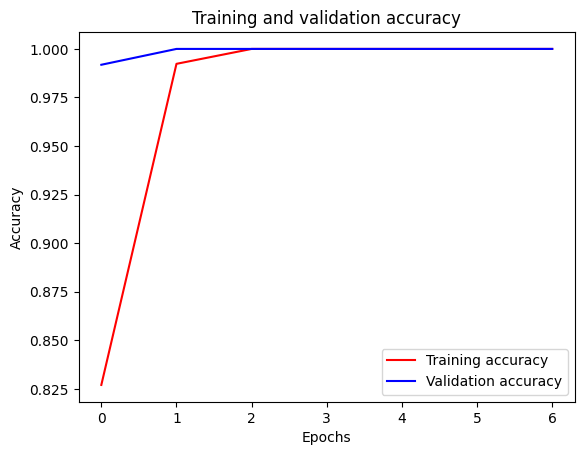

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochforPlot = range(len(acc))

#train and validation chart
plt.plot(epochforPlot, acc, 'r', label = 'Training accuracy')
plt.plot(epochforPlot, val_acc, 'b', label = 'Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc ='lower right')
plt.figure()

<Figure size 640x480 with 0 Axes>

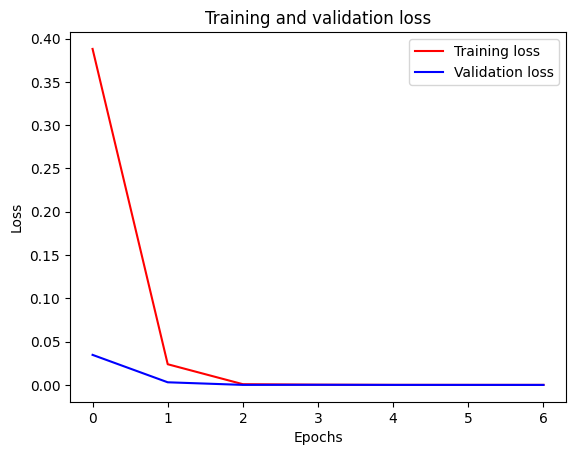

<Figure size 640x480 with 0 Axes>

In [ ]:
#loss and validation loss chart
plt.plot(epochforPlot, loss, 'r', label = 'Training loss')
plt.plot(epochforPlot, val_loss, 'b', label = 'Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend(loc ='upper right')
plt.figure()

#### Testing my data

In [ ]:
from keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/PcosData/data/pcosCNNmodel.keras")

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [ ]:
prediction = model.predict(testData)

31/31 [==============================] - 14s 455ms/step


In [ ]:
predicted_labels = (prediction > 0.5).astype(int)

In [ ]:
# Define target names
target_names = ['Healthy Ovaries', 'Detected PCOS']

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(testData)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

31/31 [==============================] - 14s 447ms/step - loss: 3.3484e-06 - accuracy: 1.0000
Test Loss: 3.3484068353573093e-06
Test Accuracy: 1.0


In [ ]:
# Generate classification report with custom labels
true_labels = testData.classes  # Get the true labels from the generator
print(classification_report(true_labels, predicted_labels, target_names=target_names))

                 precision    recall  f1-score   support

Healthy Ovaries       1.00      1.00      1.00       791
  Detected PCOS       1.00      1.00      1.00      1171

       accuracy                           1.00      1962
      macro avg       1.00      1.00      1.00      1962
   weighted avg       1.00      1.00      1.00      1962



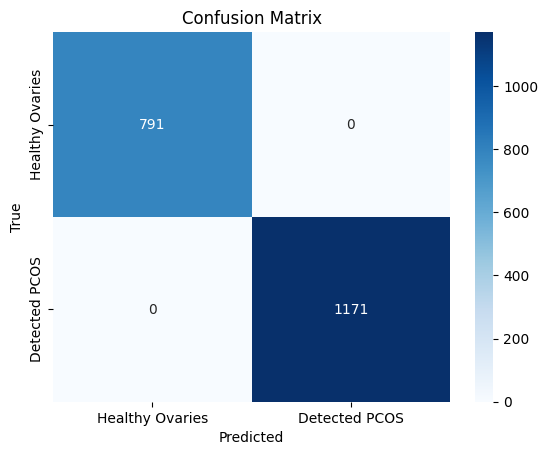

In [ ]:
# Generate confusion matrix with custom labels
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

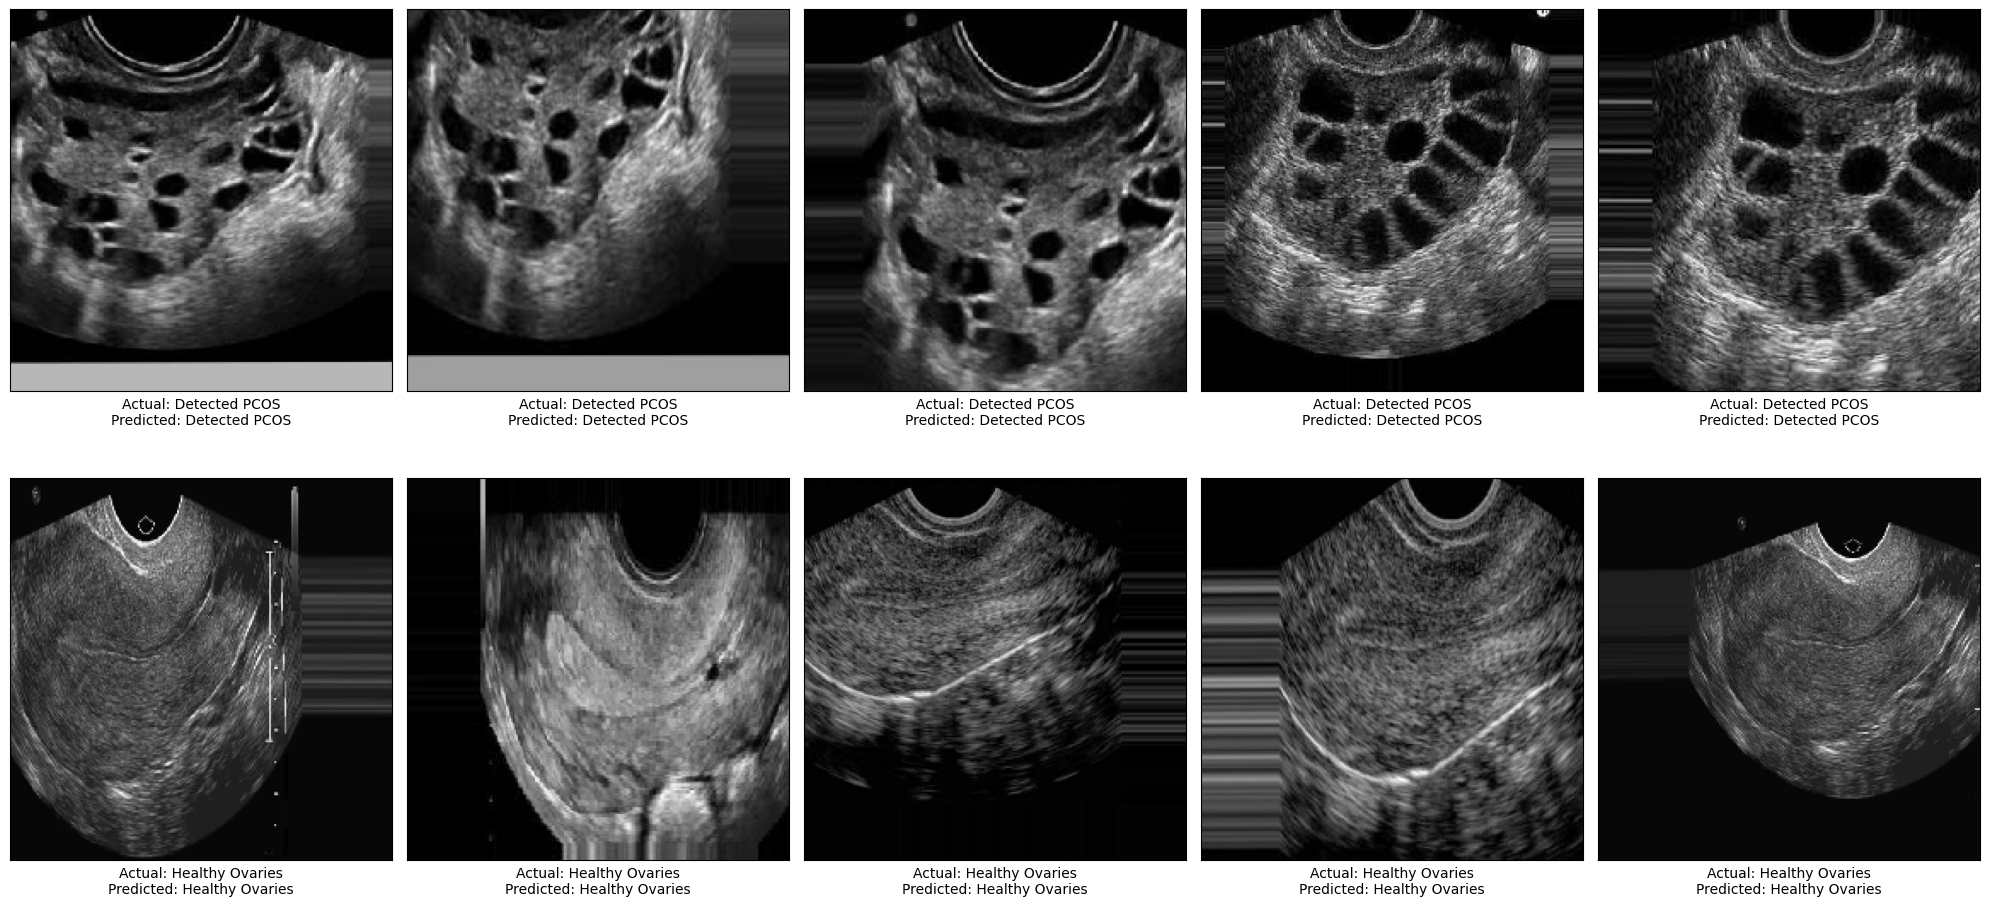

In [ ]:
# Define target names for display
target_names = ['Detected PCOS', 'Healthy Ovaries']

# Load all images and labels from the generator
# `testData` is assumed to be a generator object (like from `ImageDataGenerator`)
all_images = []
all_labels = []

# Iterate over the entire test data generator to gather all images and labels
for batch_images, batch_labels in testData:
    all_images.append(batch_images)
    all_labels.append(batch_labels)
    if len(all_images) * testData.batch_size >= len(testData.classes):  # Stop after all images are collected
        break

# Convert the lists to arrays
all_images = np.vstack(all_images)
all_labels = np.hstack(all_labels)

# Generate predicted labels from your model predictions
predicted_labels = (prediction > 0.5).astype(int).flatten()

# Ensure we get images from both classes
healthy_indices = np.where(all_labels == 0)[0]  # Indices for 'Healthy Ovaries'
pcos_indices = np.where(all_labels == 1)[0]  # Indices for 'Detected PCOS'

# Randomly select 3 healthy and 2 PCOS images for display
selected_indices = np.concatenate([
    np.random.choice(healthy_indices, 5, replace=False),
    np.random.choice(pcos_indices, 5, replace=False)
])

# Fetching the selected images and their labels
plt.figure(figsize=(20, 10))  # Adjust the width for better display of 5 images
for i, img_index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)  # 2 row and 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Access the image and true label
    image = all_images[img_index]  # Get the image
    actual_label = all_labels[img_index]  # True label
    predicted_label = predicted_labels[img_index]  # Predicted label

    # Display the image (adjust for grayscale or RGB)
    if image.shape[-1] == 3:
        plt.imshow(image)  # Display RGB image
    else:
        plt.imshow(image.squeeze(), cmap='gray')  # Display grayscale image

    # Ensure actual_label and predicted_label are integers for indexing
    plt.xlabel(f"Actual: {target_names[int(actual_label)]}\nPredicted: {target_names[int(predicted_label)]}")

# Show the plot
plt.tight_layout()
plt.show()

#### Deployment

In [ ]:
code_content = '''

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load the trained model
@st.cache(allow_output_mutation=True)
def load_model_file():
    model = load_model('/content/drive/MyDrive/PcosData/data/pcosCNNmodel.keras')
    return model

model = load_model_file()

# Define target names for display
target_names = ['Healthy Ovaries', 'Detected PCOS']

# Function to preprocess image
def preprocess_image(image, target_size=(224, 224)):
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize
    return image

# Streamlit UI
st.title("PCOS Detection with Ultrasound Images")

# Allow users to upload images
uploaded_files = st.file_uploader("Upload Ultrasound Images", type=["png", "jpg", "jpeg"], accept_multiple_files=True)

if uploaded_files:
    st.write(f"Classifying {len(uploaded_files)} image(s)...")

    # Initialize a plot for displaying images
    fig, ax = plt.subplots(1, len(uploaded_files), figsize=(20, 10))

    if len(uploaded_files) == 1:
        ax = [ax]  # Ensure ax is iterable even if only 1 image

    for i, uploaded_file in enumerate(uploaded_files):
        image = Image.open(uploaded_file)
        st.image(image, caption=f"Uploaded Image {i + 1}", use_column_width=True)

        # Preprocess the image for model input
        preprocessed_image = preprocess_image(image)

        # Get prediction
        prediction = model.predict(preprocessed_image)
        predicted_label = (prediction > 0.5).astype(int).flatten()[0]

        # Display actual and predicted labels
        ax[i].imshow(np.asarray(image))
        ax[i].set_title(f"Predicted: {target_names[predicted_label]}")
        ax[i].axis('off')

    st.pyplot(fig)
 '''

In [ ]:
# Open a file in write mode and save the code content
with open('pcos_detection_app.py', 'w') as file:
    file.write(code_content)

print("The Python script has been successfully saved to 'pcos_detection_app.py'")


The Python script has been successfully saved to 'pcos_detection_app.py'


In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/PcosData/data/pcosCNNmodel.keras'

try:
    model = load_model(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")

Model loaded successfully!
